# 당뇨병 진척도 예측하기

나이, 성별, bmi 등 10종의 데이터 기반으로 데이터 수집 당시를 기준으로 1년 뒤 비만의 진행 정도를 정량적으로 측정한 데이터

해당 데이터를 기반으로 학습된 모델을 통해 데이터가 입력되었을 때, 비만의 진척도를 정수로 표현하는 것이 목적이다.

데이터 설명
총 442명의 데이터가 존재하며 10개의 column은 전부 수치형 데이터로 구성되어 있다.

출처 : [Scikit-learn 공식 문서-비만 데이터](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

- age : 나이
- sex : 성별
- bmi : BMI (body mass index) 값
- bp : 평균 혈압
- s1 : tc, 총 혈청 콜레스테롤
- s2 : ldl, 저밀도 지질단백질
- s3 : hdl, 고밀도 지질단백질
- s4 : tch, 총 콜레스테롤/HDL
- s5 : ltg, 아마도 혈청 트리글리세리드 수치의 로그값
- s6 : glu, 혈당 수치



> Scikit-learn 공식 문서에 위와 같이 작성되어 있다. 공식 문서에서 "아마도"라는 추측성 문구가 포함 된 것에 의문이 생겨 자료를 찾아보았지만 그 이유에 대해서 명확하게 답을 찾지 못했다. 따라서 구글 제미나이에 물어 본 결과 해당 데이터는 실제 논문에서는 선형 회귀 모델 학습의 새로운 통계적 방법인 Least Angle Regression(LARS)의 효용성을 증명하기 위해 사용된 데이터셋으로 의학적 지식을 대부분 제하고 작성되어 s1~s6로 대체된 6개의 혈청 정보라고만 소개했다고 한다.또한 이 데이터는 raw data가 아닌 전처리된 데이터로 모두 표준화까지 완료되어 있으며 R을 사용한 데이터 분석을 진행할 때 column의 이름에 포함된 정보를 기반으로 이후 연구자들이 추측한 정보라고 한다.

## 데이터 불러오기

In [ ]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [ ]:
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [ ]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


## train-test 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## 모델 생성

In [ ]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [ ]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [ ]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [ ]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [ ]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [ ]:
LEARNING_RATE = 0.8

## 모델 학습

In [ ]:
%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 3599.8845
Iteration 200 : Loss 3184.2673
Iteration 300 : Loss 3034.1414
Iteration 400 : Loss 2966.2489
Iteration 500 : Loss 2933.6121
Iteration 600 : Loss 2917.2869
Iteration 700 : Loss 2908.7880
Iteration 800 : Loss 2904.1683
Iteration 900 : Loss 2901.5358
Iteration 1000 : Loss 2899.9558
177 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## 모델 평가하기

In [ ]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2876.634599238638)

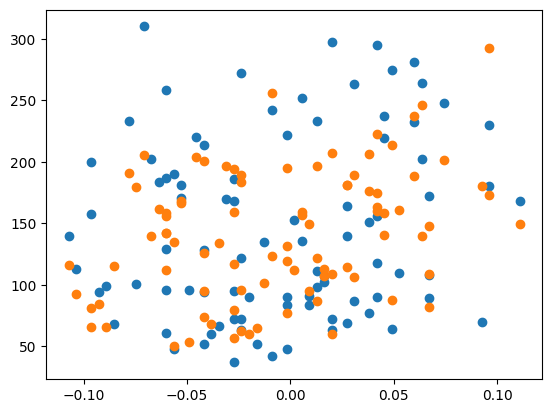

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()